In [1]:
import numpy as np
import matplotlib.pyplot as plt

[ 7.5  15.   21.25 28.75]


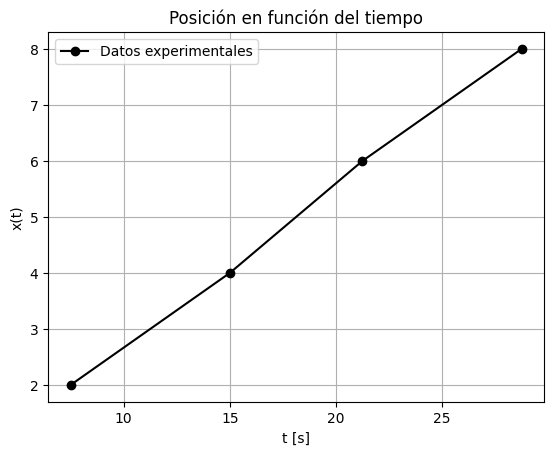

In [48]:
x=np.array([2,4,6,8]) # [m]
tsquare=np.array([0.3,0.6,0.85,1.15]) 
scale=25
t=tsquare*scale

plt.plot(t,x,"-o",color="black",label="Datos experimentales")
plt.xlabel("t [s]");plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.title("Posición en función del tiempo")
print(t)

Ecuación ajustada: x(t) = 2.854e+08 * t + -1.720e-01


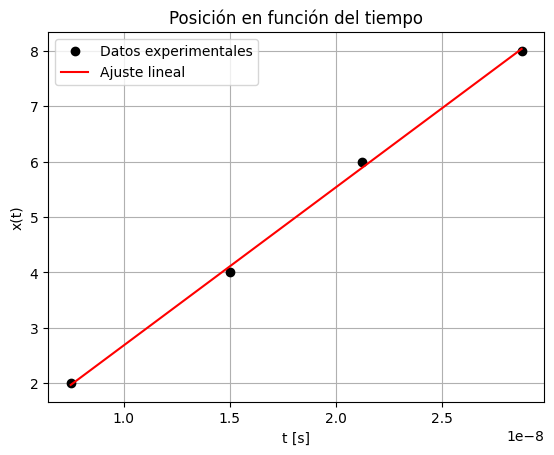

In [13]:
# Ajuste lineal: y = m*t + b
coef = np.polyfit(t, x, 1)  # grado 1 → recta
m, b = coef
print(f"Ecuación ajustada: x(t) = {m:.3e} * t + {b:.3e}")

# Recta ajustada
t_fit = np.linspace(min(t), max(t), 100)
x_fit = m * t_fit + b

# Graficar
plt.plot(t, x, "o", color="black", label="Datos experimentales")
plt.plot(t_fit, x_fit, "-", color="red", label="Ajuste lineal")
plt.xlabel("t [s]")
plt.ylabel("x(t)")
plt.title("Posición en función del tiempo")
plt.legend()
plt.grid()
plt.show()

In [14]:
def error(e):
    return np.abs(e-3e8)*100/3e8
print(error(m))

4.883227176220815


Ecuación ajustada: x(t) = (2.854e+08 ± 7.207e+06) * t + (-1.736e-01 ± 1.423e-01)


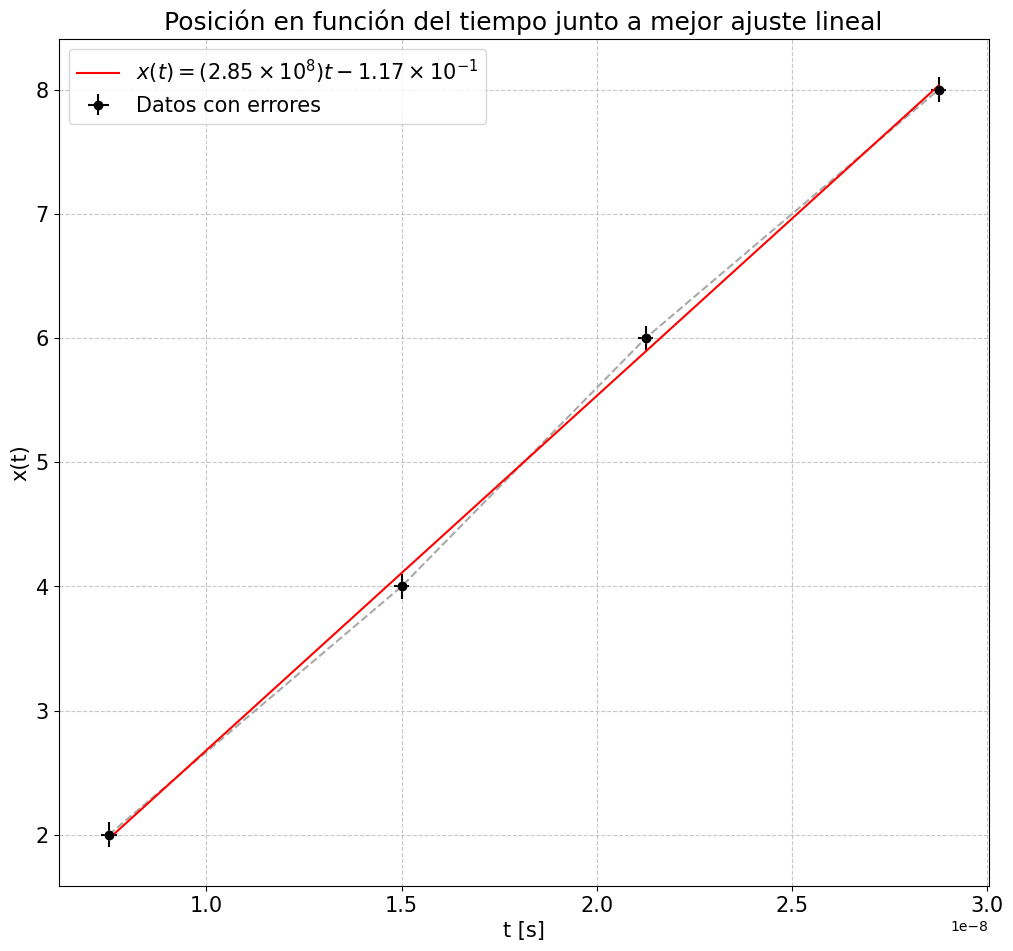

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

# Datos experimentales
x = np.array([2, 4, 6, 8])  # posición [m]
tsquare = np.array([0.3, 0.6, 0.85, 1.15])  # t^2 en 10^-9 s^2
scale = 25
t = tsquare * scale * 1e-9  # tiempo [s]

# Errores de medición
sigma_x = 0.1  # m
sigma_t = 0.2e-9  # s

# Modelo lineal
def f(beta, t):
    m, b = beta
    return m*t + b

# Preparar datos con errores
data = RealData(t, x, sx=sigma_t, sy=sigma_x)

# Ajuste con ODR
model = Model(f)
odr = ODR(data, model, beta0=[1, 0])  # valores iniciales (pendiente, intercepto)
out = odr.run()

# Resultados
m, b = out.beta
dm, db = out.sd_beta  # errores en m y b

print(f"Ecuación ajustada: x(t) = ({m:.3e} ± {dm:.3e}) * t + ({b:.3e} ± {db:.3e})")

# Graficar
t_fit = np.linspace(min(t), max(t), 100)
x_fit = f([m, b], t_fit)
plt.figure(figsize=(12, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.errorbar(t, x, xerr=sigma_t, yerr=sigma_x, fmt="o", color="black", label="Datos con errores")
plt.plot(t,x,"--o",color="darkgray")
plt.plot(t_fit, x_fit, "-", color="red", label=r"$x(t)=(2.85\times 10^8 )t -1.17\times 10^{-1}$")
plt.xlabel("t [s]",fontsize=15)
plt.ylabel("x(t)",fontsize=15)
plt.title("Posición en función del tiempo junto a mejor ajuste lineal",fontsize=18)
plt.legend(fontsize=15, loc='upper left')
plt.xticks(fontsize=15)  # tamaño de los números en el eje x
plt.yticks(fontsize=15)  # tamaño de los números en el eje y
plt.show()
